# **Libraries and Utilities**

In [34]:
import warnings
warnings.filterwarnings('ignore')

# basic libraries
import os
import numpy as np
import pandas as pd


#visulaization modules
import missingno as msno
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go

Reading the dataset using Pandas

In [35]:
# Specify the file path
file_path = "healthcare-dataset-stroke-data.csv"

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)


# **Explanatory Data Analysis**

Get more insights about the data, so we can pre-process accordingly. We can better understand with bivariate analysis and univariate anlaysis.

Univariate - describes a data that contains only one variable.
Bivariate - describes the data that contains two variables.

We want to check our the correlation between numerical variables in a dataframe, we can use corelation.

In [36]:
#We are copying it, as for some data visualization the dataset requires to be
#changed. We are using df2 for visualizations that require changes and df as
#og data set
df2 = df.copy()
df3 = df.copy()

In [37]:
df3.head()

,id+A1:L3,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,st,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [38]:
df3.drop(['id+A1:L3'], axis = 1, inplace = True)

In [39]:
# Calculate correlation matrix for numerical variables
correlation_matrix = df3.corr()

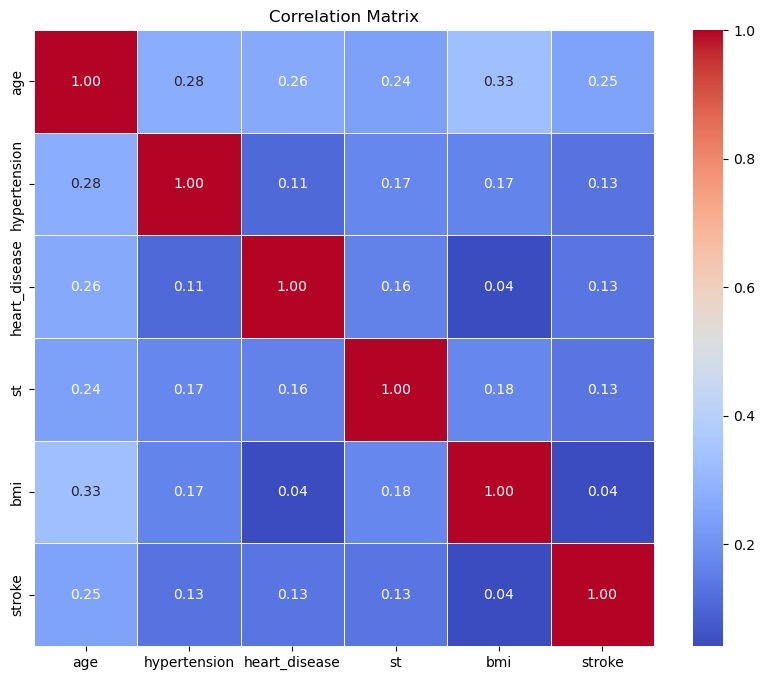

In [40]:
# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Set the title and show the plot
plt.title("Correlation Matrix")
plt.show()

# Label encode categorical variables
df3['gender'] = df3['gender'].astype('category').cat.codes
df3['ever_married'] = df3['ever_married'].astype('category').cat.codes
df3['work_type'] = df3['work_type'].astype('category').cat.codes
df3['Residence_type'] = df3['Residence_type'].astype('category').cat.codes
df3['smoking_status'] = df3['smoking_status'].astype('category').cat.codes

In [41]:
df2.drop(['id+A1:L3'], axis = 1, inplace = True)

In [42]:
df2.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,st,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


This enables

**Distribution of Stroke Status**



In [43]:
df2['stroke'] = df2['stroke'].replace({1: 'Yes', 0: 'No'})
stroke_counts = df2['stroke'].value_counts().reset_index()
stroke_counts.columns = ['Stroke', 'Count']
custom_colors = ['#252E6C', '#BC3030']
fig = px.pie(stroke_counts, names='Stroke', values='Count',
             title='Distribution of Stroke Status',
             color_discrete_sequence=custom_colors,
             hole=0.3
             )

fig.show()

This visually represents the distribution of strokes but does not provide any deeper insights.

**Percentage of Stroke cases by Gender**


In [44]:
gender_counts = df2['gender'].value_counts()
custom_colors = ['#9C9C9C' , '#252E6C',  '#893F3D']

fig1 = px.bar(gender_counts, x=gender_counts.index, y=gender_counts.values, color=gender_counts.index,
              color_discrete_map={gender: color for gender, color in zip(gender_counts.index, custom_colors)})
fig1.update_layout(title='Gender Distribution')

fig1.show()

**Stroke across age groups**

In [45]:
age_stroke_counts = df2.groupby(["age", "stroke"]).size().reset_index(name="Count")
fig_bubble_age_stroke = px.scatter(age_stroke_counts, x="age", y="Count", size="Count", color="stroke",
                                   title="Distribution of Stroke Across Age Groups",
                                   labels={"age": "Age", "Count": "Count", "stroke": "Stroke"},
                                   color_discrete_sequence=['#252E6C', '#BC3030'] )

fig_bubble_age_stroke.update_layout(xaxis_title="Age", yaxis_title="Count")

fig_bubble_age_stroke.show()

**Distribution of Patients with and without Hypertension**

In [46]:
df2['hypertension'] = df2['hypertension'].replace({1: 'Yes', 0: 'No'})
hypertension_count = df2['hypertension'].value_counts()
custom_colors = ['#252E6C', '#9C9C9C']

fig = px.pie(
    values=hypertension_count,
    names=hypertension_count.index,
    hole=0.3,
    title='Distribution of Patients with and without Hypertension',
    color_discrete_sequence=custom_colors,
)

fig.update_traces(textinfo='percent+label', pull=[0, 0.1])
fig.show()


In [47]:
stroke_rate_with_hypertension = (df[df['hypertension'] == 1]['stroke'].mean()) * 100
stroke_rate_without_hypertension = (df[df['hypertension'] == 0]['stroke'].mean()) * 100

data = pd.DataFrame({'Hypertension': ['With Hypertension', 'Without Hypertension'],
                     'Stroke Rate': [stroke_rate_with_hypertension, stroke_rate_without_hypertension]})
fig = px.bar(data, x='Hypertension', y='Stroke Rate',
             text='Stroke Rate', title='Stroke Rate by Hypertension',
             labels={'Hypertension': 'Hypertension Status', 'Stroke Rate': 'Stroke Rate (%)'})

fig.update_traces(marker_color=[ "#123F6A" ,  "#89AED2"])
fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')
fig.show()


**Stroke rate among patients with or without heart diseases**

In [48]:
df2['heart_disease'] = df2['heart_disease'].replace({1: 'Yes', 0: 'No'})
heart_disease_yes = df2[df2["stroke"] == "Yes"]["heart_disease"]
heart_disease_no = df2[df2["stroke"] == "No"]["heart_disease"]

hist_data_heart_disease = [heart_disease_yes, heart_disease_no]
group_labels_heart_disease = ["Stroke: Yes", "Stroke: No"]
colors_heart_disease = [ '#BC3030' , '#252E6C']

fig_heart_disease = go.Figure()
for i in range(2):
    fig_heart_disease.add_trace(go.Histogram(x=hist_data_heart_disease[i], nbinsx=10, opacity=0.7, name=group_labels_heart_disease[i], marker_color=colors_heart_disease[i]))

fig_heart_disease.update_layout(title="Distribution of Heart Disease by Stroke",
                                xaxis_title="Heart Disease", yaxis_title="Frequency")
fig_heart_disease.show()


**Stroke rate by marital status**

In [49]:
attrition_by_ever_married = df2.groupby("ever_married")["stroke"].value_counts(normalize=True).unstack().reset_index()
custom_colors = [ '#010408' , '#252E6C']

fig_pie_ever_married = px.pie(attrition_by_ever_married, values="Yes", names="ever_married", hole=0.4,
                              title="Stroke Rate by Marital Status",
                              labels={"ever_married": "Ever Married"},
                              color_discrete_map={'Yes': custom_colors[0], 'No': custom_colors[1]})
fig_pie_ever_married.update_traces(textinfo="percent+label", pull=[0.1, 0.1], showlegend=False)
fig_pie_ever_married.update_layout(annotations=[dict(text="Stroke Rate", x=0.5, y=0.5, font_size=20, showarrow=False)])

fig_pie_ever_married.show()


**Stroke rate by Work type**

In [50]:
work_stroke_rates = df.groupby("work_type")["stroke"].mean().reset_index()
colors = ['#252E6C']

fig = px.bar(work_stroke_rates, x="work_type", y="stroke",
             title="Stroke Rate by Work Type",
             labels={"work_type": "Work Type", "stroke": "Stroke Rate"},
             color_discrete_sequence=colors)

fig.update_layout(xaxis_title="Work Type", yaxis_title="Stroke Rate")
fig.show()

**Stroke by Residence Type**


In [51]:
residence_stroke_counts = df2.groupby(['Residence_type', 'stroke']).size().unstack().reset_index()
residence_stroke_counts.columns = ['Residence_type', 'No', 'Yes']

custom_colors =['#252E6C', '#BC3030']
fig = px.bar(residence_stroke_counts, x='Residence_type', y=['No', 'Yes'],
             title='Distribution of Stroke Status by Residence Type',
             color_discrete_sequence=custom_colors,
             labels={'variable': 'Stroke', 'value': 'Count'},
             )
fig.show()

From the chart, we can observe that the dataset contains a higher number of individuals from urban areas ("Urban") compared to rural areas ("Rural"). Additionally, it appears that the count of stroke cases ("Yes") is generally higher in urban areas compared to rural areas, which suggests a potential correlation between residence type and stroke incidence.

**Stroke rate against glucose level groups**

In [52]:
print (df['avg_glucose_level'].min())
print( df['avg_glucose_level'].max())
glucose_bins = [55.12, 70, 99, 125, 271.74]
glucose_labels = ['Low', 'Normal', 'Pre-Diabetes', 'Diabetes']
df2['avg_glucose_level_group'] = pd.cut(df2['avg_glucose_level'], bins=glucose_bins, labels=glucose_labels, right=False)
print(df2[['avg_glucose_level', 'avg_glucose_level_group']].head())

KeyError: 'avg_glucose_level'

In [ ]:
custom_palette = ['#BC3030', '#252E6C']  # Exchanged the colors
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df2, x='avg_glucose_level_group', hue='stroke', palette=custom_palette)
plt.title("Distribution of Stroke Cases by Average Glucose Level Group")
plt.xlabel("Average Glucose Level Group")
plt.ylabel("Count")
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f"{int(height)}", (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')
plt.legend(title="Stroke", labels=["Yes", "No"])
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

When analyzing the stroke risk in different average glucose level groups, we observed that the risk follows an ascending order as follows: "Low" < "Normal" < "Pre-Diabetes" < "Diabetes." This suggests that individuals with "Diabetes" tend to have the highest stroke risk, while those with "Low" average glucose levels have the lowest risk.


**Stokes by BMI group**

In [ ]:
bmi_bins = [10, 18.5, 24.9, 29.9, 34.9, 39.9, 50, float('inf')]
bmi_labels = ['Underweight', 'Normal', 'Overweight', 'Obese Class I', 'Obese Class II', 'Obese Class III' , 'Extreme Obesity']
df2['bmi_group'] = pd.cut(df2['bmi'], bins=bmi_bins, labels=bmi_labels, right=False)
print(df2['bmi'].min())
print(df2['bmi'].max())
print(df2[['bmi', 'bmi_group']].head())


In [ ]:
bmi_stroke_counts = df2.groupby(['bmi_group', 'stroke']).size().reset_index(name='Count')
fig = px.bar(bmi_stroke_counts, x='bmi_group', y='Count', color='stroke',
             title='Distribution of Strokes by BMI Group',
             labels={'bmi_group': 'BMI Group', 'Count': 'Count', 'stroke': 'Stroke'},
             color_discrete_sequence=['#252E6C', '#BC3030'] )
fig.update_layout(xaxis_title='BMI Group', yaxis_title='Count', legend_title='Stroke')
fig.show()

**Stoke by Smoking status**

In [ ]:
smoking_stroke_counts = df2.groupby(['smoking_status', 'stroke']).size().unstack().fillna(0).reset_index()
custom_colors = ['#0E2B59', '#355384', '#7793BE' , '#C6CBD2']

fig = px.pie(smoking_stroke_counts, names='smoking_status', values='Yes',
             title='Stroke Distribution by Smoking Status',
             color_discrete_sequence=custom_colors)

fig.update_traces(hole=0.4, textinfo='percent+label')

fig.show()

**Heart Disease by Age group**

In [ ]:
age_bins = [0, 20, 40, 60, 80, float('inf')]
age_labels = ['0-20', '21-40', '41-60', '61-80', '81+']
df2['age_group'] = pd.cut(df2['age'], bins=age_bins, labels=age_labels, right=False)
print(df2[['age', 'age_group']].head())

In [ ]:
plt.figure(figsize=(12, 6))
custom_palette = ['#BC3030', '#252E6C']  # Exchanged the colors
sns.countplot(x="age_group", hue="heart_disease", data=df2, palette=custom_palette)
plt.title("Prevalence of Heart Disease by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.grid(True)
# Change the order of labels in the legend
plt.legend(title="Heart Disease", labels=["Yes", "No"])
plt.xticks(rotation=45)
plt.show()

**Age by HyperTension**

In [ ]:
df2['hypertension'] = df2['hypertension'].replace({1: 'Yes', 0: 'No'})
plt.figure(figsize=(10, 6))
sns.swarmplot(x="hypertension", y="age", data=df2)
plt.title("Distribution of Age by Hypertension Category")
plt.xlabel("Hypertension")
plt.ylabel("Age")
plt.grid(True)
plt.show()

**Stroke Occurence**

In [ ]:
stroke = dict(df['stroke'].value_counts())

fig = px.pie(names = stroke.keys(),values = stroke.values(),title = 'Stroke Occurance',color_discrete_sequence=px.colors.sequential.Aggrnyl)
fig.update_traces(textposition='inside', textinfo='percent+label')

Data is Imbalanced